# Urban Distance

## Imports & Parameters

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import rasterio
from tqdm import tqdm_notebook as tqdm
from shapely.geometry import shape

In [2]:
# Add local module to the path
src = os.path.abspath('../src')
if src not in sys.path:
    sys.path.append(src)

In [3]:
from metadata import City, CITIES
from landsat import Scene
from raster import euclidean_distance

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
def pretty(city_id):
    """Format city label."""
    name = city_id.title()
    name = name.replace('_', '-')
    return name

In [6]:
# Plotting style
plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
plt.rc('font', family='serif', serif='cmr10', size=12)
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.rc('figure', titlesize=12)
plt.rc('text', usetex=True)

## Relationship with spectral distance

In [67]:
step = 100  # In meters
distances = np.arange(0, 2010, step)
spectral_distance = pd.DataFrame(index=CITIES, columns=distances)
count = pd.DataFrame(index=CITIES, columns=distances)

progress = tqdm(total=len(CITIES) * len(distances))

for city_name in CITIES:
    
    city = City(city_name)
    scene = Scene(city.landsat_dir)
    urban_distance = city.urban_distance
    bu = city.reference == 1
    sign_ref = scene.signature(bu)
    
    mask = scene.mask | city.water
    
    for dist in distances:
        
        y = (urban_distance >= dist) & (urban_distance < dist + step) & ~mask
        y = y.astype(np.bool)
        
        if np.count_nonzero(y) == 0:
            progress.update(1)
            continue
        
        sign_y = scene.signature(y)
        spectral_distance.at[(city_name, dist)] = euclidean_distance(sign_y, sign_ref)
        
        y_b = (urban_distance >= dist) & ~mask
        count.at[(city_name, dist)] = np.count_nonzero(y_b)
        
        progress.update(1)

progress.close()

HBox(children=(IntProgress(value=0, max=210), HTML(value='')))

In [68]:
spectral_distance

,0,100,200,300,400,500,600,700,800,900,...,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000
antananarivo,0.0569967,0.0647646,0.0655483,0.0665496,0.0682743,0.0711264,0.074348,0.0771567,0.0801369,0.0818766,...,0.0770356,0.0742998,0.0719764,0.0719549,0.0718286,0.0735096,0.0763064,0.0814893,0.0833807,0.0810356
chimoio,0.0982533,0.121994,0.118888,0.115386,0.114338,0.115447,0.115685,0.115905,0.117169,0.118377,...,0.112034,0.110093,0.116855,0.136856,0.16091,0.17134,NaN,NaN,NaN,NaN
dakar,0.0263443,0.0757111,0.124001,0.165609,0.187916,0.181531,0.29232,NaN,0.488197,NaN,...,0.486946,0.467972,0.405348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gao,0.135451,0.0961408,0.0777452,0.0650792,0.05902,0.0559652,0.0557707,0.0545259,0.0533579,0.0524472,...,0.0531183,0.0567301,0.059769,0.0665073,0.0734015,0.0787927,0.0874917,0.0981323,0.112248,0.129023
johannesburg,0.0160399,0.0460965,0.047895,0.0480367,0.0474525,0.050119,0.0544311,0.0559015,0.0564935,0.0594635,...,0.07913,0.0841989,0.0807293,0.0675189,0.10056,NaN,NaN,NaN,NaN,NaN
kampala,0.0898705,0.135359,0.144909,0.150546,0.154862,0.156279,0.157608,0.159494,0.162829,0.166274,...,0.183223,0.195458,0.210388,0.222388,0.234019,0.248159,0.256443,0.259048,0.264211,0.271531
katsina,0.175706,0.234799,0.240882,0.243612,0.244234,0.244823,0.24363,0.244236,0.244195,0.243755,...,0.240698,0.241219,0.238239,0.236778,0.235616,0.237443,0.237579,0.239362,0.240908,0.240749
nairobi,0.106084,0.139296,0.137815,0.132336,0.125426,0.118853,0.116614,0.115075,0.114228,0.110464,...,0.103525,0.0997515,0.0984341,0.0976327,0.0954809,0.0965732,0.0972585,0.0969201,0.0953363,0.0960123
saint_louis,0.0746708,0.0940262,0.104747,0.112709,0.116722,0.12108,0.120592,0.117119,0.111597,0.10651,...,0.099479,0.0994651,0.10565,0.104955,0.105658,0.105414,0.10489,0.110814,0.109573,0.113058
windhoek,0.103158,0.125596,0.126808,0.128456,0.12866,0.127816,0.12675,0.126535,0.125437,0.126477,...,0.124373,0.125613,0.127888,0.126562,0.126274,0.129077,0.129755,0.129071,0.128162,0.128576


In [71]:
count.sort_values(by=500)

,0,100,200,300,400,500,600,700,800,900,...,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000
dakar,254097,22972,7714,2429,607,144,25,NaN,13,NaN,...,10,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
johannesburg,1764500,423359,241106,149344,95557,61408,40791,26427,16943,10707,...,4002,2220,1003,349,60,NaN,NaN,NaN,NaN,NaN
chimoio,1779895,1214746,762492,480314,309224,202782,137394,90065,58064,35877,...,11213,5612,2602,1135,420,75,NaN,NaN,NaN,NaN
antananarivo,1767473,973356,631641,433078,314222,241396,195639,160759,137890,121918,...,100650,93797,87911,83154,78927,74811,71219,67969,64663,61762
nairobi,1773414,936175,659853,497452,393544,318091,263758,217597,181433,153188,...,110326,94283,81166,71222,63074,55621,49527,44344,39434,35389
kampala,1776465,1049811,818090,652721,529249,434285,364377,304298,258161,222012,...,169265,150581,134432,121260,110255,100354,91956,84591,77224,70713
saint_louis,970389,847348,777629,713685,654013,598103,549612,502704,460848,422403,...,353768,323740,296037,271996,249969,227672,207952,190254,172801,157314
windhoek,1777722,1307860,1090590,935633,822187,738040,676152,622957,579177,540691,...,472995,444295,417866,394984,374035,352747,333311,315331,296460,279214
gao,1317727,1181489,1107617,1041768,982339,926139,876078,825741,779165,736179,...,656667,620842,586435,555113,525830,496211,469506,444937,419762,397524
katsina,1781993,1551477,1410990,1278290,1155637,1041443,940747,842724,757356,680940,...,546408,488822,436416,392684,353657,316448,284305,255938,228224,204410


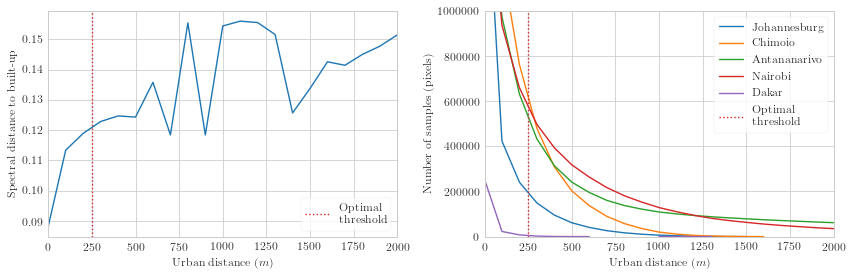

In [76]:
f, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

axes[0].plot(spectral_distance.mean(axis=0))
axes[0].axvline(x=250, color='C3', linestyle=':', label='Optimal\nthreshold')
axes[0].set_xlim(0, 2000)
axes[0].legend(frameon=True, loc='lower right')
axes[0].set_xlabel('Urban distance ($m$)')
axes[0].set_ylabel('Spectral distance to built-up')

for city in ['johannesburg', 'chimoio', 'antananarivo', 'nairobi', 'dakar']:
    axes[1].plot(count.loc[city], label=pretty(city))

axes[1].set_xlim(0, 2000)
axes[1].set_ylim(0, 1000000)
axes[1].axvline(x=250, color='C3', linestyle=':', label='Optimal\nthreshold')
axes[1].set_ylabel('Number of samples (pixels)')
axes[1].set_xlabel('Urban distance ($m$)')
axes[1].legend(frameon=True)

f.tight_layout()
f.savefig('../paper/figures/urban_distance.pdf')
f.savefig('../paper/figures/urban_distance.png');